### Описание данных

Имеются следующие переменные:

- **journey_id** – уникальный id поездки
- **user_id** – id пользователя
- **driver_id** – id водителя
- **taxi_id** – id машины
- **icon** – тип поездки
- **start_type** – тип заказа (asap, reserved, delayed)
- **start_at** – время начала поездки
- **start_lat** – исходное местоположение пользователя, широта
- **start_lon** – исходное местоположение пользователя, долгота
- **end_at** – время окончания поездки
- **end_lat** – итоговое местоположение, широта
- **end_lon** – итоговое местоположение, долгота
- **end_state** – состояние заказа
- **driver_start_lat** – исходное местоположение водителя, широта
- **driver_start_lon** – исходное местоположение водителя, долгота
- **arrived_at** – время прибытия водителя
- **source** – платформа, с которой сделан заказ
- **driver_score** – оценка водителя клиентом
- **rider_score** – оценка клиента водителем

In [1]:
# Импорт библиотек
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
# Считаем данные и отобразим первые 5 строк
taxi_peru = pd.read_csv('taxi_peru.csv', sep=';', parse_dates=['start_at', 'end_at', 'arrived_at'])
taxi_peru.head()

,journey_id,user_id,driver_id,taxi_id,icon,start_type,start_at,start_lat,start_lon,end_at,end_lat,end_lon,end_state,driver_start_lat,driver_start_lon,arrived_at,source,driver_score,rider_score
0,23a1406fc6a11d866e3c82f22eed4d4c,0e9af5bbf1edfe591b54ecdfd7e91e26,583949a89a9ee17d19e3ca4f137b6b4c,b12f4f09c783e29fe0d0ea624530db56,executive,asap,2010-11-16 16:44:00,"-12,13983536","-77,02355957",2010-11-16 17:29:00,"-12,05537033","-77,0413208",drop off,"-12,10825481","-77,0272739",2010-11-16 17:02:00,iPhone,5.0,5.0
1,dd2af4715d0dc16eded53afc0e243577,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:34:00,"-12,13874817","-76,99536133",2010-06-01 00:37:00,"-12,12465668","-77,02886963",not found,NaN,NaN,NaT,iPhone,NaN,NaN
2,dd91e131888064bf7df3ce08f3d4b4ad,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-05-31 05:01:00,"-12,12453079","-77,02780151",2010-05-31 05:04:00,"-12,13883209","-76,99530029",not found,NaN,NaN,NaT,iPhone,NaN,NaN
3,dd2af4715d0dc16eded53afc0e2466d0,a553c46e3a22fb9c326aeb3d72b3334e,NaN,NaN,executive,asap,2010-06-01 00:29:00,"-12,13885117","-76,99530029",2010-06-01 00:32:00,"-12,12458801","-77,02896118",not found,NaN,NaN,NaT,iPhone,NaN,NaN
4,85b7eabcf5d84e42dc7629b7d27781af,56772d544fdfa589a020a1ff894a86f7,d665fb9f75ef5d9cd0fd89479380ba78,0accdd3aa5a322f4129fa20b53278c69,executive,reserved,2010-09-11 23:55:00,"-12,08995438","-76,92626953",2010-09-12 01:07:00,"-12,02223206","-77,10638428",drop off,"-12,08311558","-76,9277072",2010-09-11 23:50:00,iPhone,4.0,5.0


In [3]:
# Посмотрим на размерность данных
taxi_peru.shape

(23111, 19)

## Задания

#### 1) Проверьте, с какой платформы было сделано больше всего заказов. В ответе укажите значение в %, округлённое до целого.

In [4]:
source_most_used = taxi_peru.value_counts('source').head(1) / sum(taxi_peru.value_counts('source'))
print(f'Больше всего заказов было сделано с платформы {source_most_used.index[0]} - {source_most_used[0]:.0%} от всех заказов.')

Больше всего заказов было сделано с платформы iPhone - 42% от всех заказов.


#### 2) Проверим, как распределены оценки водителей (driver_score). Для подготовки данных выполните следующие шаги:
- **Посчитайте частоту встречаемости каждой из оценок**
- **Переведите в проценты и округлите до 2 знаков после точки**
- **Сбросьте индексы**
- **Переименуйте колонки в driver_score и percentage**
- **Отсортируйте по driver_score в порядке возрастания (от 0 до 5)**
- **Запишите результат в driver_score_counts**
- **Постройте график**

In [5]:
# Сделаем необходимые преобразования
driver_score_counts = taxi_peru \
                                .value_counts('driver_score', normalize=True) \
                                .mul(100) \
                                .round(2) \
                                .reset_index() \
                                .rename(columns={0: 'percentage'}) \
                                .sort_values('driver_score')

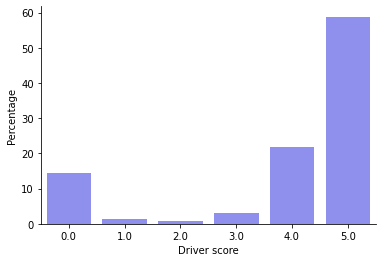

In [6]:
# Визуализируем данные по оценкам водителям
ax = sns.barplot(x='driver_score', y='percentage', data=driver_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()  # убрать часть рамки графика
plt.show()

#### 3) Проделайте аналогичные шаги для rider_score (оценок клиентов водителями), не забыв построить график. В чем его отличие от распределения оценок водителей?

In [7]:
# Сделаем необходимые преобразования
rider_score_counts = taxi_peru \
                            .value_counts('rider_score', normalize=True) \
                            .mul(100) \
                            .round(2) \
                            .reset_index() \
                            .rename(columns={0: 'percentage'}) \
                            .sort_values('rider_score')

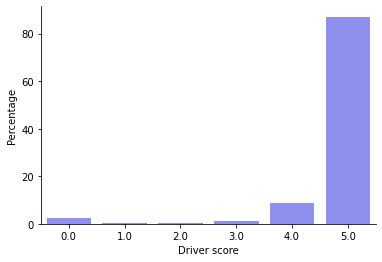

In [8]:
# Визуализируем данные по оценкам клиентам
ax = sns.barplot(x='rider_score', y='percentage', data=rider_score_counts, color='blue', alpha=0.5)
ax.set(xlabel='Driver score', ylabel='Percentage')
sns.despine()
plt.show()

**Выводы:**
- более чем в 80% случаев водители поставили клиентам 5 звездочек;
- водители ставят меньше 0, чем клиенты